In [3]:
!python --version

Python 3.8.13


In [4]:
import sys

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

import os

print(os.getcwd())


/Users/gimdongju/Documents/workspace/git/study/coding_test/assignment_test


In [8]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    plt.style.use('seaborn-darkgrid')
    rc('font', family = 'AppleGothic')
    


In [10]:
df=pd.read_csv("./dataset/201306-citibike-tripdata.csv",encoding='euc-kr') 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [11]:
df.shape

(577703, 15)

In [12]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,5.777030e+05,577703.000000,577703.000000,577703.000000,559644.000000,559644.000000,559644.000000,577703.000000,337382.000000,577703.000000
mean,1.372570e+03,439.228836,40.732436,-73.991251,441.910624,40.732146,-73.991244,17617.434516,1974.644945,0.710431
std,9.028063e+03,337.240318,0.021423,0.013002,345.448311,0.021507,0.013105,1677.518719,10.780255,0.678268
min,6.100000e+01,72.000000,40.646607,-74.017134,72.000000,40.646607,-74.017134,14529.000000,1899.000000,0.000000
25%,5.140000e+02,309.000000,40.717400,-74.001768,309.000000,40.716887,-74.001971,16161.000000,1968.000000,0.000000
50%,8.740000e+02,404.000000,40.734546,-73.990741,403.000000,40.734232,-73.990741,17638.000000,1977.000000,1.000000
75%,1.398000e+03,482.000000,40.749013,-73.981948,482.000000,40.748549,-73.981923,19066.000000,1983.000000,1.000000
max,3.876479e+06,3020.000000,40.771522,-73.950048,3020.000000,40.771522,-73.950048,20625.000000,1997.000000,2.000000


In [13]:
df.isnull().sum().to_frame('nan_count')

,nan_count
tripduration,0
starttime,0
stoptime,0
start station id,0
start station name,0
start station latitude,0
start station longitude,0
end station id,18059
end station name,18059
end station latitude,18059


In [14]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
tripduration,0.000000
starttime,0.000000
stoptime,0.000000
start station id,0.000000
start station name,0.000000
start station latitude,0.000000
start station longitude,0.000000
end station id,0.031260
end station name,0.031260
end station latitude,0.031260


In [15]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [18]:
df['start station id']=df['start station id'].astype(str)
df['end station id']=df['end station id'].astype(str)
df['bikeid']=df['bikeid'].astype(str)
df.dtypes 

tripduration                 int64
starttime                   object
stoptime                    object
start station id            object
start station name          object
start station latitude     float64
start station longitude    float64
end station id              object
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                      object
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [20]:
df['trip duration min']=df['tripduration'] /60

In [21]:
df['trip duration min'].describe()

count    577703.000000
mean         22.876171
std         150.467717
min           1.016667
25%           8.566667
50%          14.566667
75%          23.300000
max       64607.983333
Name: trip duration min, dtype: float64

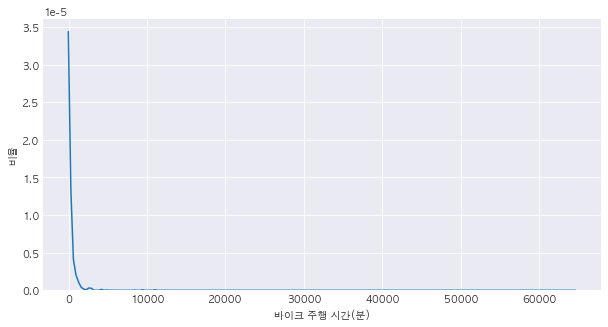

In [23]:
plt.figure(figsize=(10,5))
# 캔버스에 그림 그리기
kde=sb.kdeplot(df['trip duration min']) 
kde.set_xlabel("바이크 주행 시간(분)")
kde.set_ylabel("비율")

# 다 그려진 캔버스 보여주기
plt.show()

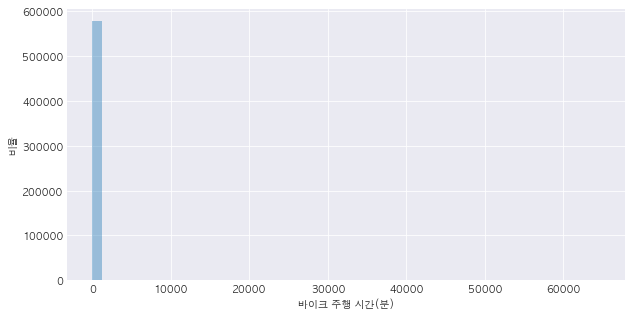

In [30]:
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sb.distplot(df['trip duration min'], kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

In [26]:
print("Skewness: %f" % df['trip duration min'].skew())
print("Kurtosis: %f" % df['trip duration min'].kurt())


Skewness: 224.020365
Kurtosis: 78921.681569


In [28]:
cut_point = df['trip duration min'].quantile(0.99)
df_cut=df[df['trip duration min'] < cut_point]

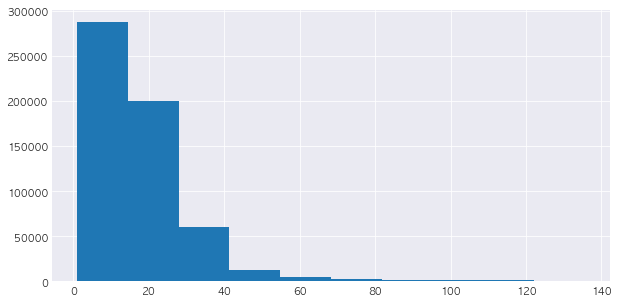

In [29]:
plt.figure(figsize=(10,5))
df_cut['trip duration min'].hist()
plt.show()

In [31]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 준비
data = pd.DataFrame({'value': np.random.rand(100)})
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 2. 시계열 데이터셋 생성 (윈도우 크기 5)
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3. 모델 생성 및 훈련
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=10, batch_size=1)

# 4. 예측
prediction = model.predict(X)
print(scaler.inverse_transform(prediction))

2024-10-26 15:11:49.449894: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-26 15:11:49.450042: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max
Epoch 1/10


2024-10-26 15:11:50.489487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-26 15:11:51.173539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-26 15:11:51.251109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-26 15:11:53.059103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 5s 6ms/step - loss: 0.1363
Epoch 2/10
95/95 [==============================] - 1s 6ms/step - loss: 0.1025
Epoch 3/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0995
Epoch 4/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0959
Epoch 5/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0971
Epoch 6/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0934
Epoch 7/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0949
Epoch 8/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0930
Epoch 9/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0875
Epoch 10/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0914


2024-10-26 15:12:00.338706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-26 15:12:00.372416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 107ms/step
[[0.43987304]
 [0.43083936]
 [0.43680936]
 [0.43501663]
 [0.44262165]
 [0.44416   ]
 [0.4399477 ]
 [0.44556195]
 [0.4374244 ]
 [0.44501647]
 [0.44622633]
 [0.43747723]
 [0.44140607]
 [0.43565196]
 [0.4363382 ]
 [0.44003937]
 [0.4379032 ]
 [0.4351571 ]
 [0.4423123 ]
 [0.43855956]
 [0.44034645]
 [0.44006112]
 [0.43890032]
 [0.43777335]
 [0.43949625]
 [0.4474652 ]
 [0.44692916]
 [0.44117683]
 [0.43501216]
 [0.43098506]
 [0.4386609 ]
 [0.44418418]
 [0.4409516 ]
 [0.44148442]
 [0.43701643]
 [0.4368978 ]
 [0.44252148]
 [0.44326165]
 [0.4366001 ]
 [0.4402424 ]
 [0.4296885 ]
 [0.4367121 ]
 [0.44174016]
 [0.43233755]
 [0.43929076]
 [0.42670292]
 [0.43086088]
 [0.44200724]
 [0.4390408 ]
 [0.44610596]
 [0.43460092]
 [0.42651322]
 [0.44011965]
 [0.43243232]
 [0.43746328]
 [0.43285072]
 [0.43114954]
 [0.45127508]
 [0.4518498 ]
 [0.44127962]
 [0.43715218]
 [0.42767945]
 [0.4383732 ]
 [0.4480697 ]
 [0.44254696]
 [0.43488726]
 [0.43201455]
 [0.42531

In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 준비
data = pd.DataFrame({'value': np.random.rand(100)})
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 2. 시계열 데이터셋 생성 (윈도우 크기 5)
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3. 모델 생성 및 훈련
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=10, batch_size=1)

# 4. 예측
prediction = model.predict(X)
print(scaler.inverse_transform(prediction))

Epoch 1/10


2024-10-26 15:12:02.091065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-26 15:12:02.165295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-26 15:12:02.232813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 1s 6ms/step - loss: 0.1202
Epoch 2/10
95/95 [==============================] - 1s 7ms/step - loss: 0.0992
Epoch 3/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0945
Epoch 4/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0957
Epoch 5/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0960
Epoch 6/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0922
Epoch 7/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0909
Epoch 8/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0893
Epoch 9/10
95/95 [==============================] - 1s 6ms/step - loss: 0.0891
Epoch 10/10
3/3 [==============================] - 0s 15ms/step
[[0.4720518 ]
 [0.4835725 ]
 [0.48766193]
 [0.48487723]
 [0.46883774]
 [0.45746148]
 [0.44726712]
 [0.4504781 ]
 [0.44590503]
 [0.45045978]
 [0.4717366 ]
 [0.4591858 ]
 [0.45894212]
 [0.47479457]
 [0.4848383 ]
 [0.48971534]
 [0.4698364 

2024-10-26 15:12:08.058348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-26 15:12:08.088986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. 데이터 준비
data = pd.DataFrame({'feature1': np.random.rand(100), 'feature2': np.random.rand(100), 'target': np.random.rand(100)})
X = data[['feature1', 'feature2']]
y = data['target']

# 2. 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 훈련
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 4. 예측 및 평가
predictions = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, predictions)}')

MSE: 0.11220114654128624
